In [8]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

In [9]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [10]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
val_path = '../dataset_organized/validation/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)
X_val, y_val = load_images(val_path)

classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# One hot encoding the target variable
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)

# Splitting the training set into training and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

  0%|          | 0/287 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 485.95it/s]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,126 (56.39 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

c:\Users\andre\Documents\GitHub\Projeto-CAA-1\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.2670 - loss: 1.7858 - val_accuracy: 0.4939 - val_loss: 1.4120
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.4367 - loss: 1.4335 - val_accuracy: 0.5335 - val_loss: 1.2214
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.5148 - loss: 1.3039 - val_accuracy: 0.5732 - val_loss: 1.1400
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.5513 - loss: 1.1908 - val_accuracy: 0.5793 - val_loss: 1.0783
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.5789 - loss: 1.1179 - val_accuracy: 0.6006 - val_loss: 1.0266
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.5634 - loss: 1.0998 - val_accuracy: 0.6128 - val_loss: 0.9735
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.6094 - loss: 1.0731 - val_accuracy: 0.6189 - val_loss: 0.9363
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.6281 - loss: 1.0177 - val_accuracy: 0.6494 - v

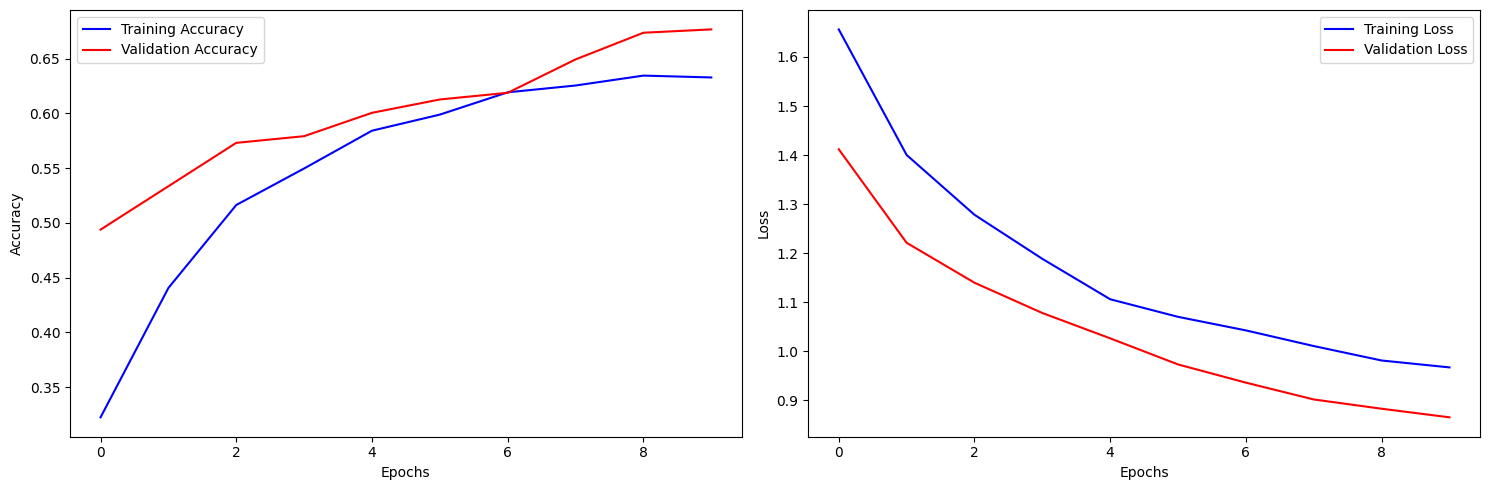

Training Accuracy: 0.6329185366630554
Validation Accuracy: 0.6768292784690857
Training Loss: 0.9674370288848877
Validation Loss: 0.8656803369522095


In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('aug_vgg_model.h5')
plt.figure(figsize=(15, 5))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()



print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Building the VGG16 model with L2 Regularization


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.3313 - loss: 1.8217 - val_accuracy: 0.4665 - val_loss: 1.4326
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.4995 - loss: 1.3904 - val_accuracy: 0.5884 - val_loss: 1.1982
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.5765 - loss: 1.2154 - val_accuracy: 0.6037 - val_loss: 1.1087
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.6213 - loss: 1.1255 - val_accuracy: 0.6372 - val_loss: 1.0478
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.6396 - loss: 1.0589 - val_accuracy: 0.6677 - val_loss: 1.0032
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.6743 - loss: 0.9928 - val_accuracy: 0.6738 - val_loss: 0.9790
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.6879 - loss: 0.9616 - val_accuracy: 0.6829 - val_loss: 0.9557
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.6785 - loss: 0.9571 - val_accuracy: 0.7012 - v

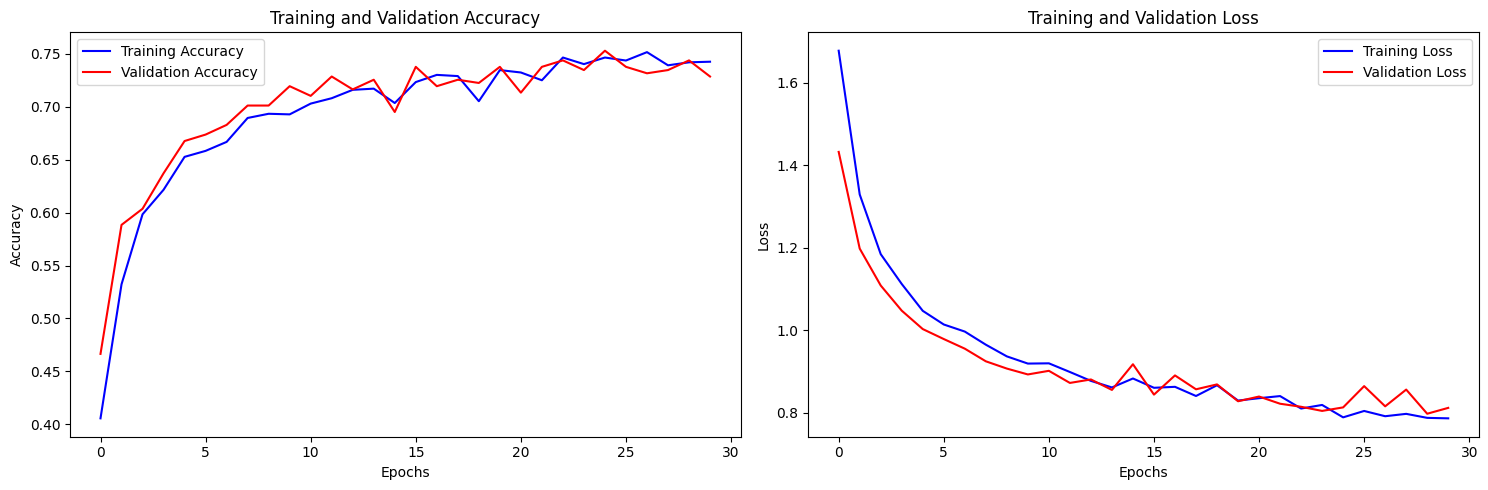

Training Accuracy: 0.7426470518112183
Validation Accuracy: 0.7286585569381714
Training Loss: 0.7868177890777588
Validation Loss: 0.8121916651725769


In [12]:
from keras.regularizers import l2

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('aug_vgg_model_l2.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the VGG16 model with L1 Regularization


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.3174 - loss: 4.2508 - val_accuracy: 0.4878 - val_loss: 2.6391
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.4691 - loss: 2.4220 - val_accuracy: 0.5640 - val_loss: 1.8505
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.5561 - loss: 1.8191 - val_accuracy: 0.5457 - val_loss: 1.6592
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.5675 - loss: 1.6561 - val_accuracy: 0.5823 - val_loss: 1.5116
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.6039 - loss: 1.5214 - val_accuracy: 0.5793 - val_loss: 1.4562
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.6043 - loss: 1.4771 - val_accuracy: 0.5823 - val_loss: 1.4310
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 248s 4s/step - accuracy: 0.5893 - loss: 1.4525 - val_accuracy: 0.5915 - val_loss: 1.3584
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.5935 - loss: 1.4101 - val_accuracy: 0.6311 - v

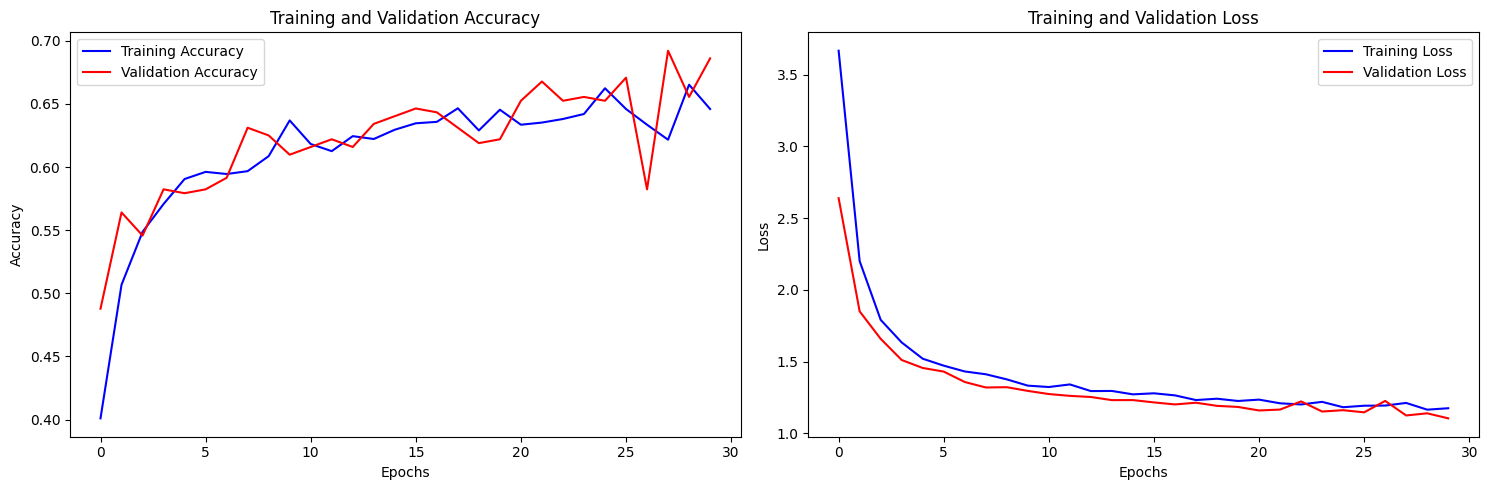

Training Accuracy: 0.6459276080131531
Validation Accuracy: 0.6859756112098694
Training Loss: 1.175703763961792
Validation Loss: 1.1052945852279663


In [13]:
from keras.regularizers import l1

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l1(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('aug_vgg_model_l1.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the VGG16 model with Dropout Regularization


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.2626 - loss: 1.7603 - val_accuracy: 0.4604 - val_loss: 1.3633
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.4608 - loss: 1.3662 - val_accuracy: 0.5244 - val_loss: 1.2101
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.5208 - loss: 1.2443 - val_accuracy: 0.5579 - val_loss: 1.1033
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.5568 - loss: 1.1726 - val_accuracy: 0.5793 - val_loss: 1.0411
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.5795 - loss: 1.1083 - val_accuracy: 0.6098 - val_loss: 0.9932
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.5957 - loss: 1.0766 - val_accuracy: 0.6524 - val_loss: 0.9441
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6228 - loss: 1.0268 - val_accuracy: 0.6341 - val_loss: 0.9286
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6112 - loss: 0.9864 - val_accuracy: 0.6738 - v

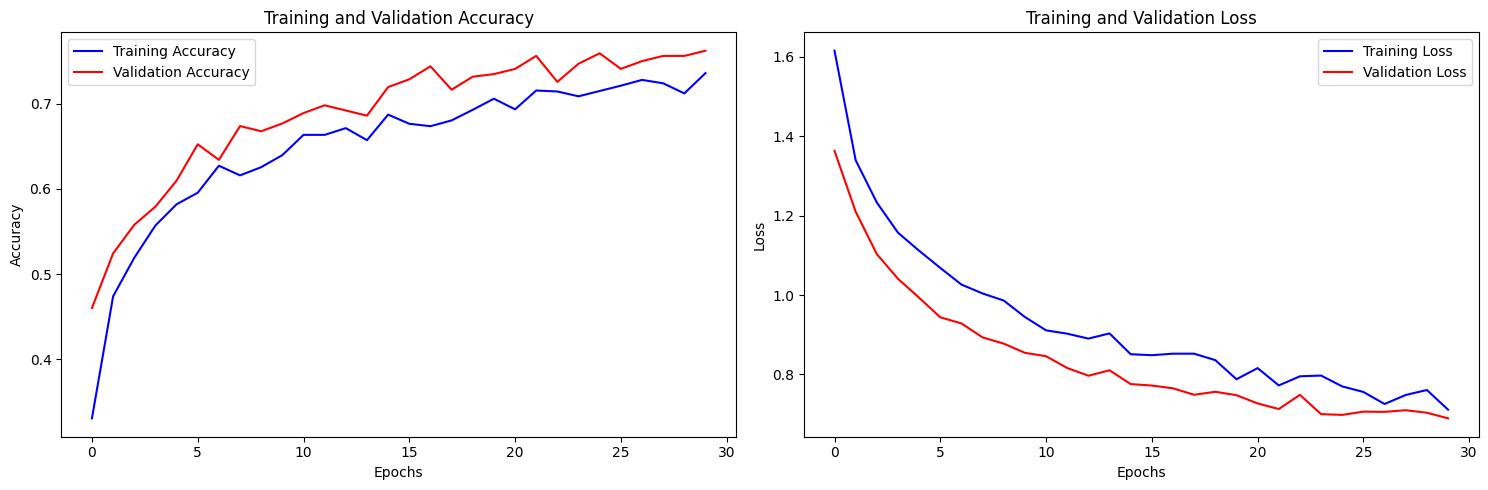

Training Accuracy: 0.735859751701355
Validation Accuracy: 0.7621951103210449
Training Loss: 0.7114074230194092
Validation Loss: 0.6895126104354858


In [14]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('aug_vgg_model_dropout.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the VGG16 model with EarlyStopping


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.2865 - loss: 1.6797 - val_accuracy: 0.5518 - val_loss: 1.2576
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.5531 - loss: 1.2242 - val_accuracy: 0.5793 - val_loss: 1.0964
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.5685 - loss: 1.1137 - val_accuracy: 0.6006 - val_loss: 0.9894
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6046 - loss: 1.0595 - val_accuracy: 0.6494 - val_loss: 0.9277
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6408 - loss: 0.9666 - val_accuracy: 0.6402 - val_loss: 0.8943
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6604 - loss: 0.9310 - val_accuracy: 0.6768 - val_loss: 0.8621
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6923 - loss: 0.8595 - val_accuracy: 0.6890 - val_loss: 0.8420
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6742 - loss: 0.8312 - val_accuracy: 0.7104 - v

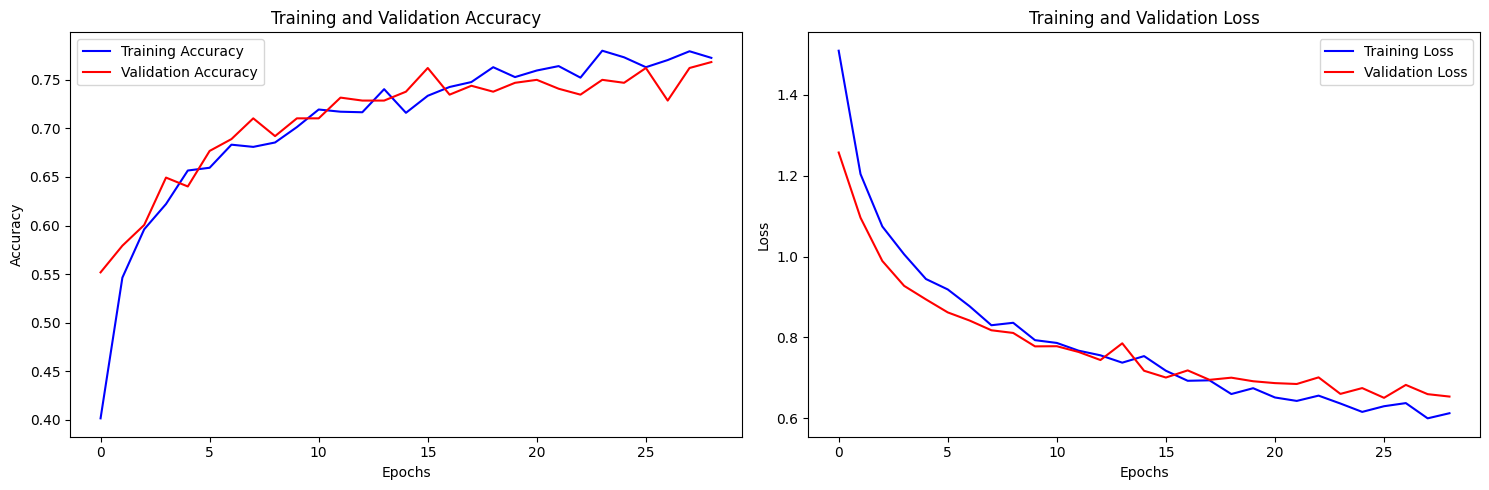

Training Accuracy: 0.7726244330406189
Validation Accuracy: 0.7682926654815674
Training Loss: 0.612655758857727
Validation Loss: 0.6538513898849487


In [15]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Saving the model
model.save('aug_vgg_model_es.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the VGG16 model with Dropout + EarlyStopping


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.2668 - loss: 1.7590 - val_accuracy: 0.5091 - val_loss: 1.3428
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.4673 - loss: 1.3939 - val_accuracy: 0.5396 - val_loss: 1.2008
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.5253 - loss: 1.2507 - val_accuracy: 0.5701 - val_loss: 1.1068
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.5449 - loss: 1.1587 - val_accuracy: 0.5762 - val_loss: 1.0565
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.5595 - loss: 1.1275 - val_accuracy: 0.6006 - val_loss: 1.0262
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.5816 - loss: 1.0932 - val_accuracy: 0.6220 - val_loss: 0.9749
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6206 - loss: 1.0256 - val_accuracy: 0.6555 - val_loss: 0.9321
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.6501 - loss: 0.9941 - val_accuracy: 0.6616 - v

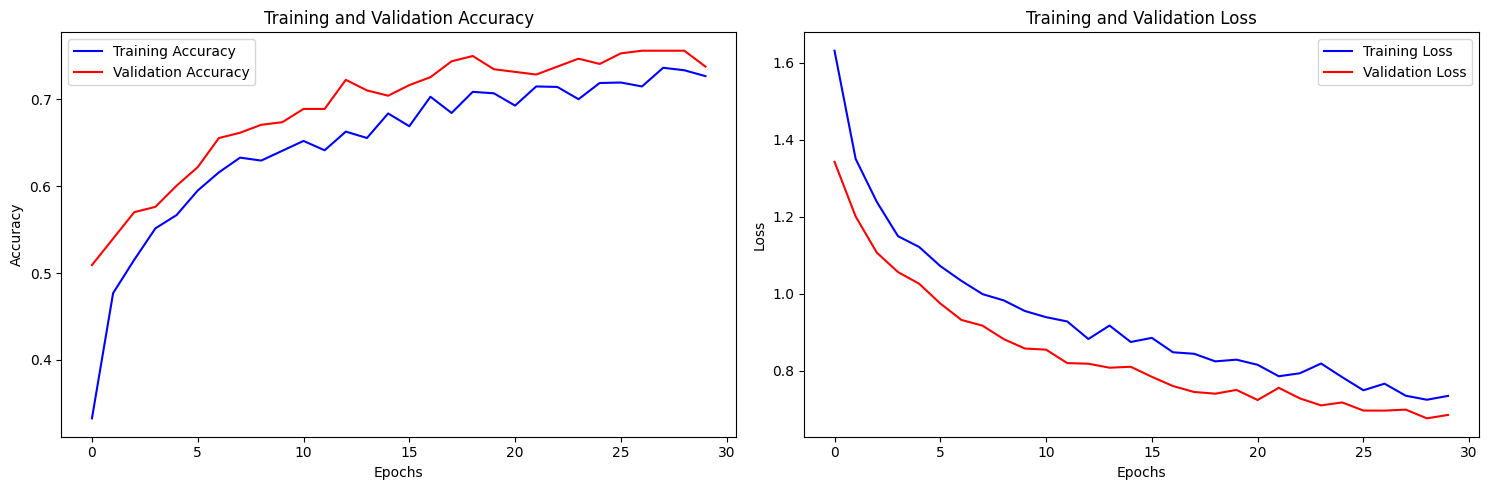

Training Accuracy: 0.7268099784851074
Validation Accuracy: 0.7378048896789551
Training Loss: 0.7349573373794556
Validation Loss: 0.6854844093322754


In [16]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Saving the model
model.save('aug_vgg_model_de.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    accuracy_score, roc_curve, auc,
    classification_report, confusion_matrix
)

def evaluate_model(predictions, y_true, class_names):
    # F1 Score
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("F1 Score: ", f1)

    # Precision
    precision = precision_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Precision: ", precision)

    # Recall
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Recall: ", recall)

    # Accuracy
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))
    print("Accuracy: ", accuracy)

    # Compute ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))

    # Plot ROC + Confusion Matrix in one figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # ROC Curve Plot
    for i in range(len(class_names)):
        axes[0].plot(fpr[i], tpr[i], label=class_names[i] + f' (AUC = {roc_auc[i]:.2f})')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_title('ROC Curve')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend()

    # Confusion Matrix Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Classification Report
    print(classification_report(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), target_names=class_names))



Loading the model



Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.7319 - loss: 0.8099
Test Loss: 0.8479655981063843
Test Accuracy: 0.7146171927452087
F1 Score:  0.6960302583859512
Precision:  0.7471024041497967
Recall:  0.7146171693735499
Accuracy:  0.7146171693735499


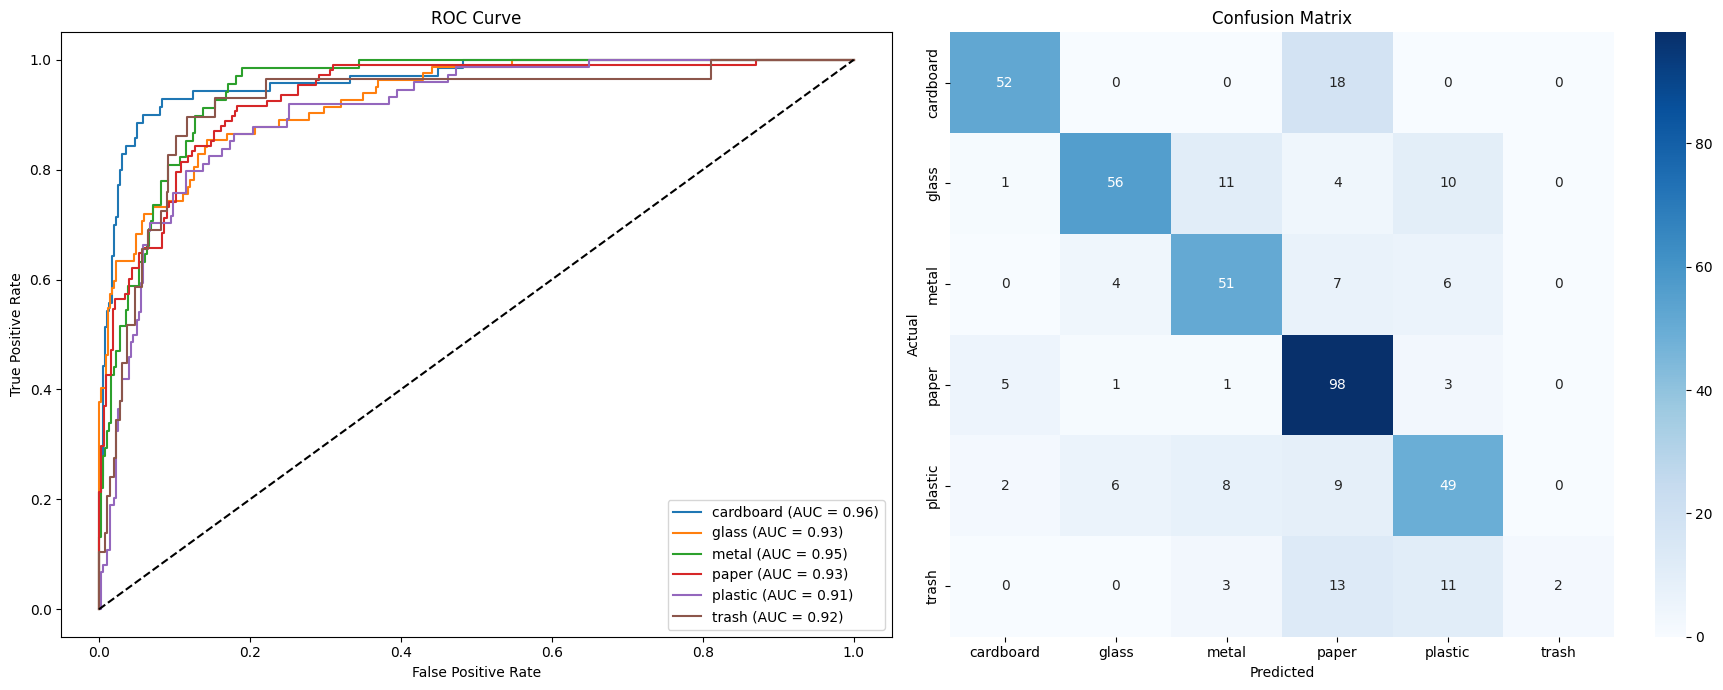

              precision    recall  f1-score   support

   cardboard       0.87      0.74      0.80        70
       glass       0.84      0.68      0.75        82
       metal       0.69      0.75      0.72        68
       paper       0.66      0.91      0.76       108
     plastic       0.62      0.66      0.64        74
       trash       1.00      0.07      0.13        29

    accuracy                           0.71       431
   macro avg       0.78      0.64      0.63       431
weighted avg       0.75      0.71      0.70       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.7446 - loss: 0.8009
Test Loss: 0.8310667872428894
Test Accuracy: 0.7378190159797668
F1 Score:  0.7246341362485236
Precision:  0.7436848176663392
Recall:  0.7378190255220418
Accuracy:  0.7378190255220418


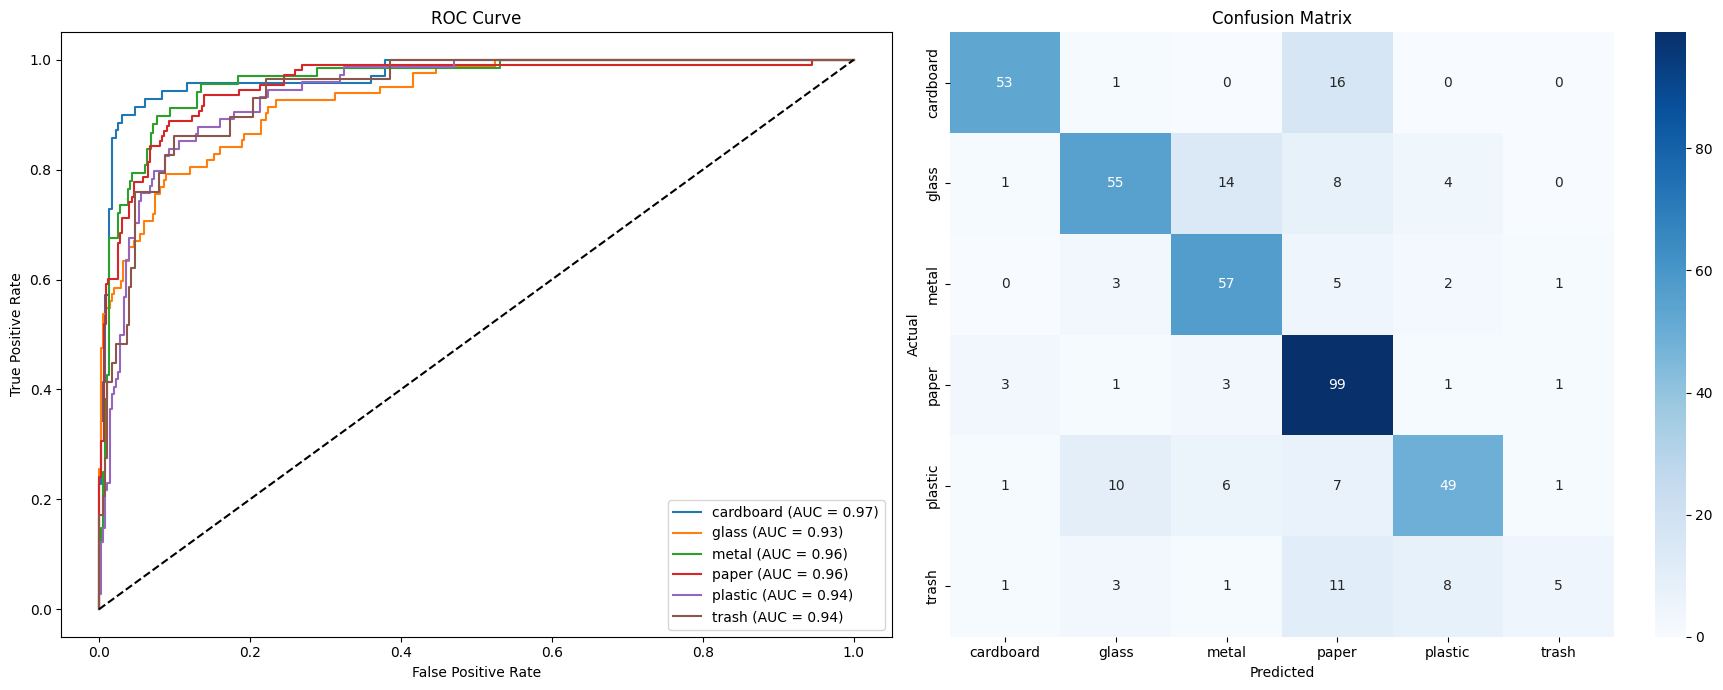

              precision    recall  f1-score   support

   cardboard       0.90      0.76      0.82        70
       glass       0.75      0.67      0.71        82
       metal       0.70      0.84      0.77        68
       paper       0.68      0.92      0.78       108
     plastic       0.77      0.66      0.71        74
       trash       0.62      0.17      0.27        29

    accuracy                           0.74       431
   macro avg       0.74      0.67      0.68       431
weighted avg       0.74      0.74      0.72       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.7550 - loss: 0.9869
Test Loss: 1.0627187490463257
Test Accuracy: 0.7099767923355103
F1 Score:  0.695439922093615
Precision:  0.7091093065222994
Recall:  0.7099767981438515
Accuracy:  0.7099767981438515


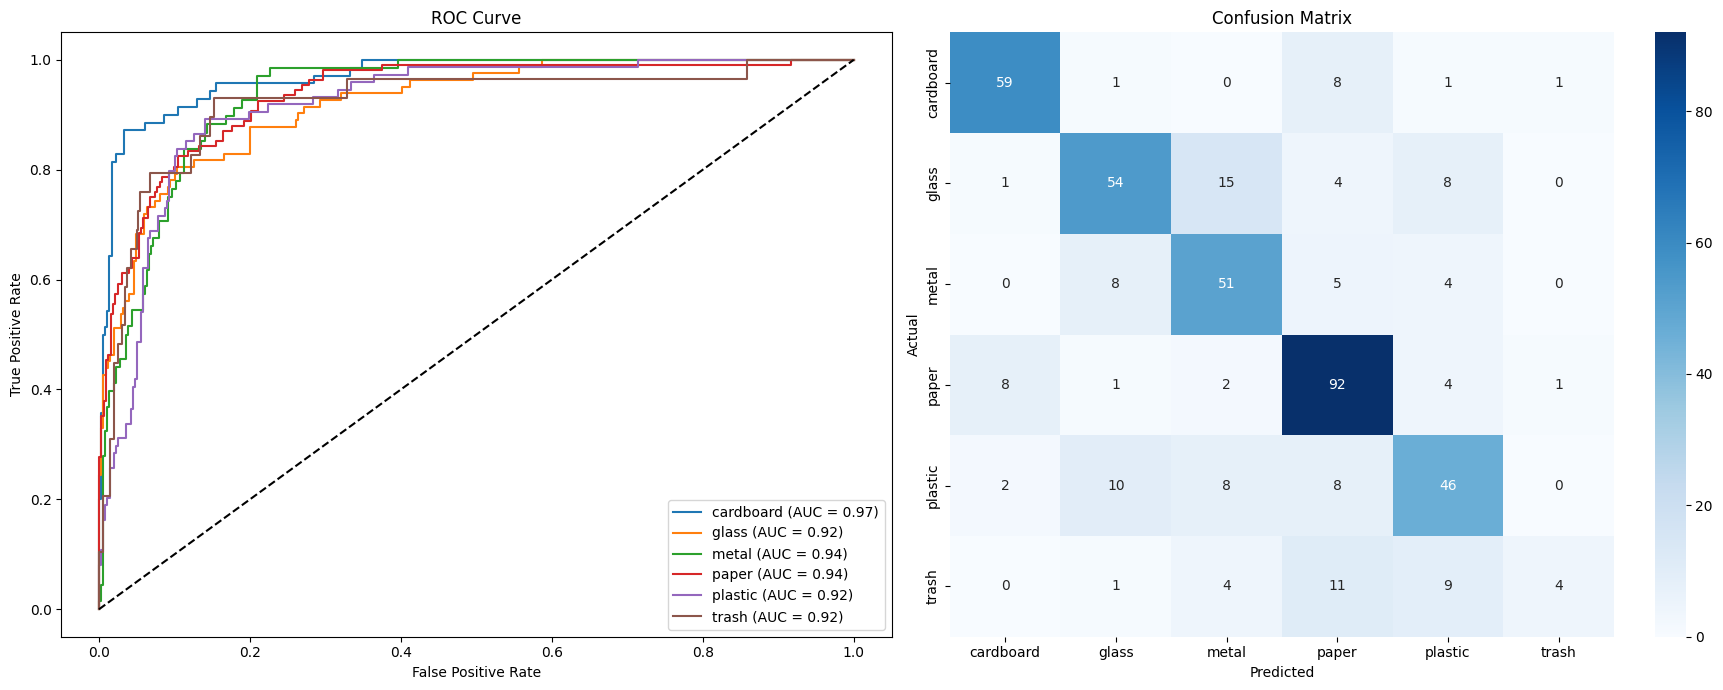

              precision    recall  f1-score   support

   cardboard       0.84      0.84      0.84        70
       glass       0.72      0.66      0.69        82
       metal       0.64      0.75      0.69        68
       paper       0.72      0.85      0.78       108
     plastic       0.64      0.62      0.63        74
       trash       0.67      0.14      0.23        29

    accuracy                           0.71       431
   macro avg       0.70      0.64      0.64       431
weighted avg       0.71      0.71      0.70       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.7741 - loss: 0.6421
Test Loss: 0.6906834840774536
Test Accuracy: 0.7424594163894653
F1 Score:  0.7319546737628017
Precision:  0.7409006254904511
Recall:  0.7424593967517401
Accuracy:  0.7424593967517401


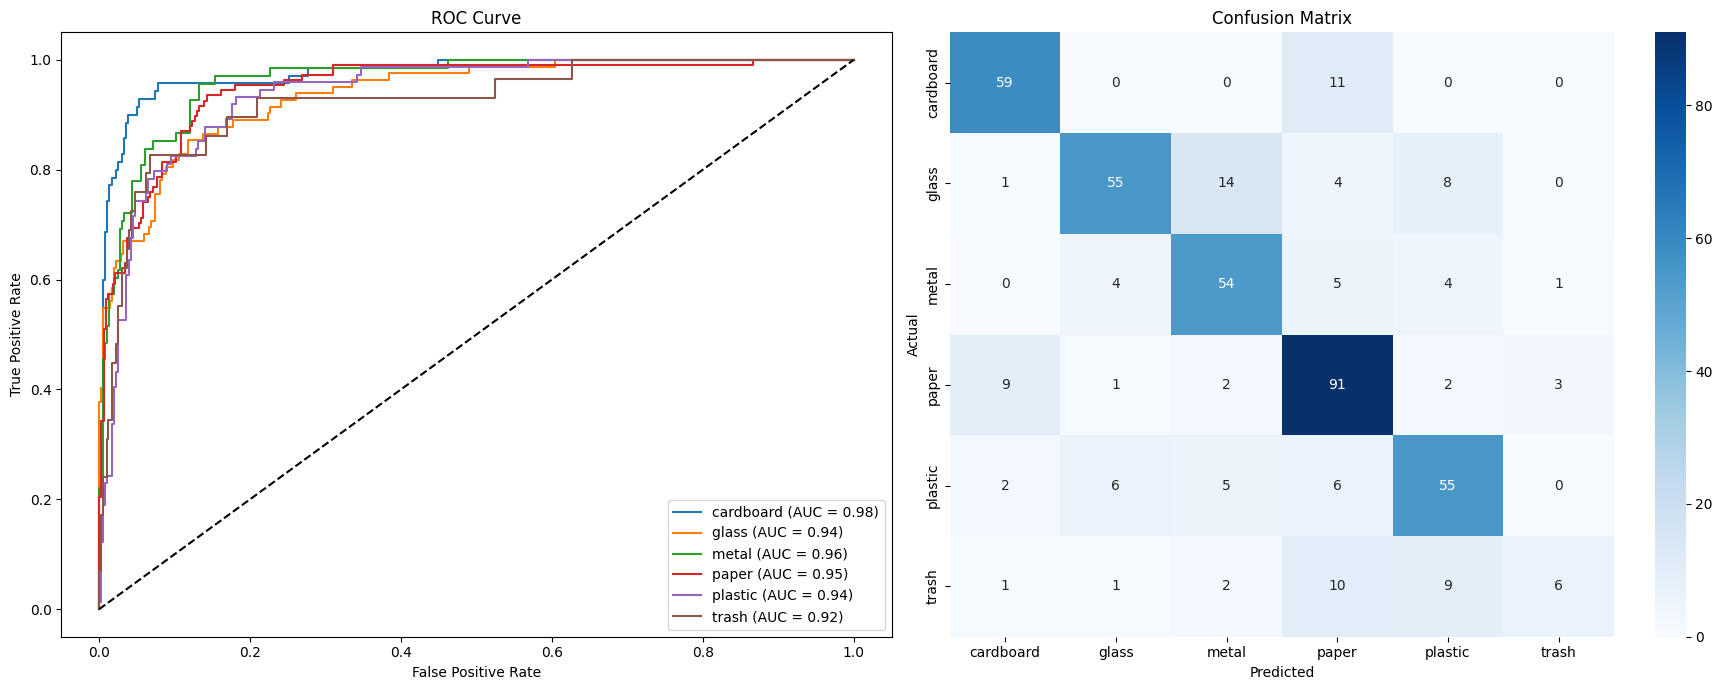

              precision    recall  f1-score   support

   cardboard       0.82      0.84      0.83        70
       glass       0.82      0.67      0.74        82
       metal       0.70      0.79      0.74        68
       paper       0.72      0.84      0.77       108
     plastic       0.71      0.74      0.72        74
       trash       0.60      0.21      0.31        29

    accuracy                           0.74       431
   macro avg       0.73      0.68      0.69       431
weighted avg       0.74      0.74      0.73       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.8246 - loss: 0.5889
Test Loss: 0.6573475003242493
Test Accuracy: 0.7795823812484741
F1 Score:  0.7747429225987219
Precision:  0.7756242410268701
Recall:  0.7795823665893271
Accuracy:  0.7795823665893271


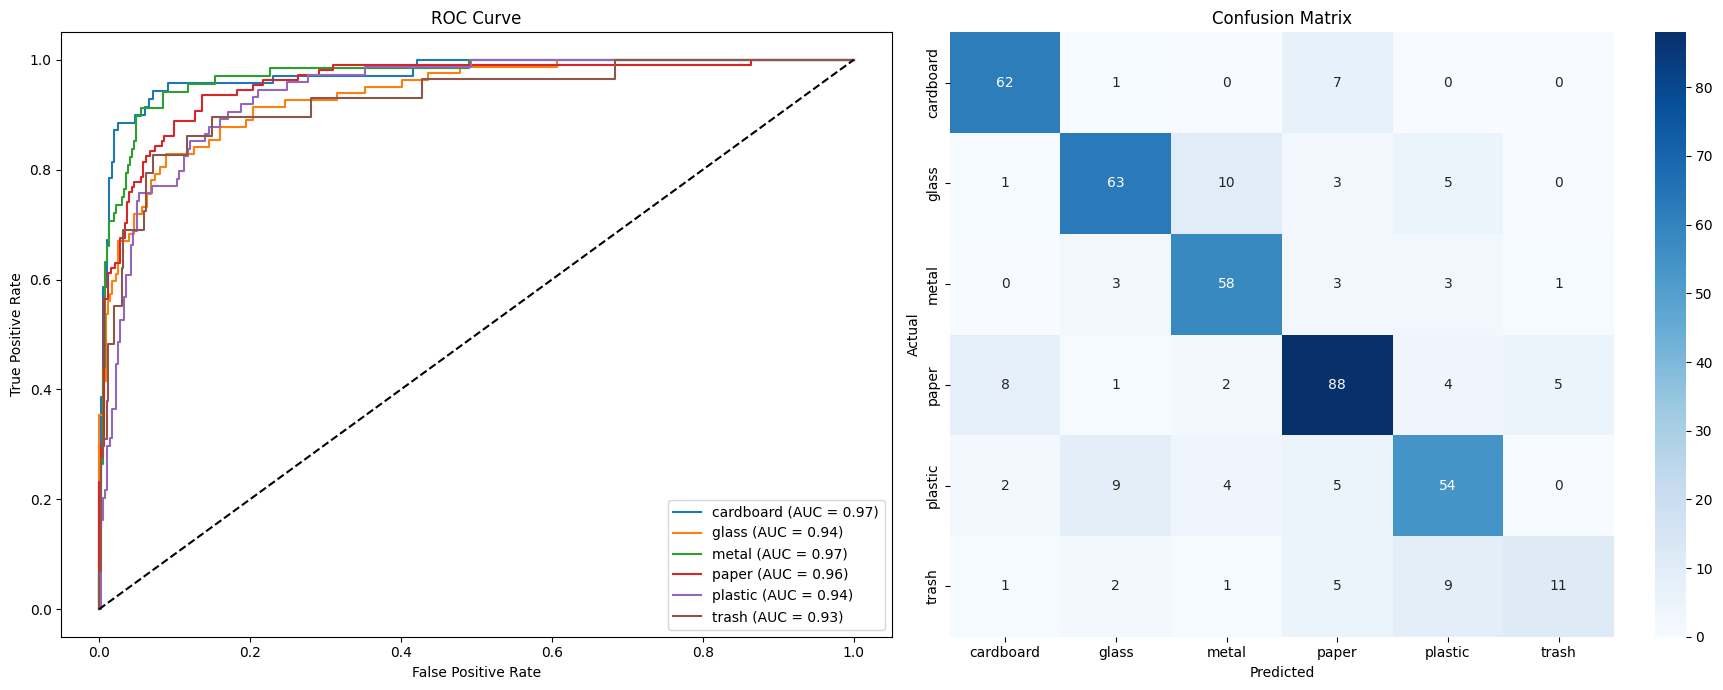

              precision    recall  f1-score   support

   cardboard       0.84      0.89      0.86        70
       glass       0.80      0.77      0.78        82
       metal       0.77      0.85      0.81        68
       paper       0.79      0.81      0.80       108
     plastic       0.72      0.73      0.72        74
       trash       0.65      0.38      0.48        29

    accuracy                           0.78       431
   macro avg       0.76      0.74      0.74       431
weighted avg       0.78      0.78      0.77       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.7822 - loss: 0.6216
Test Loss: 0.6881804466247559
Test Accuracy: 0.7494199275970459
F1 Score:  0.7443698683076099
Precision:  0.7572465965708749
Recall:  0.7494199535962877
Accuracy:  0.7494199535962877


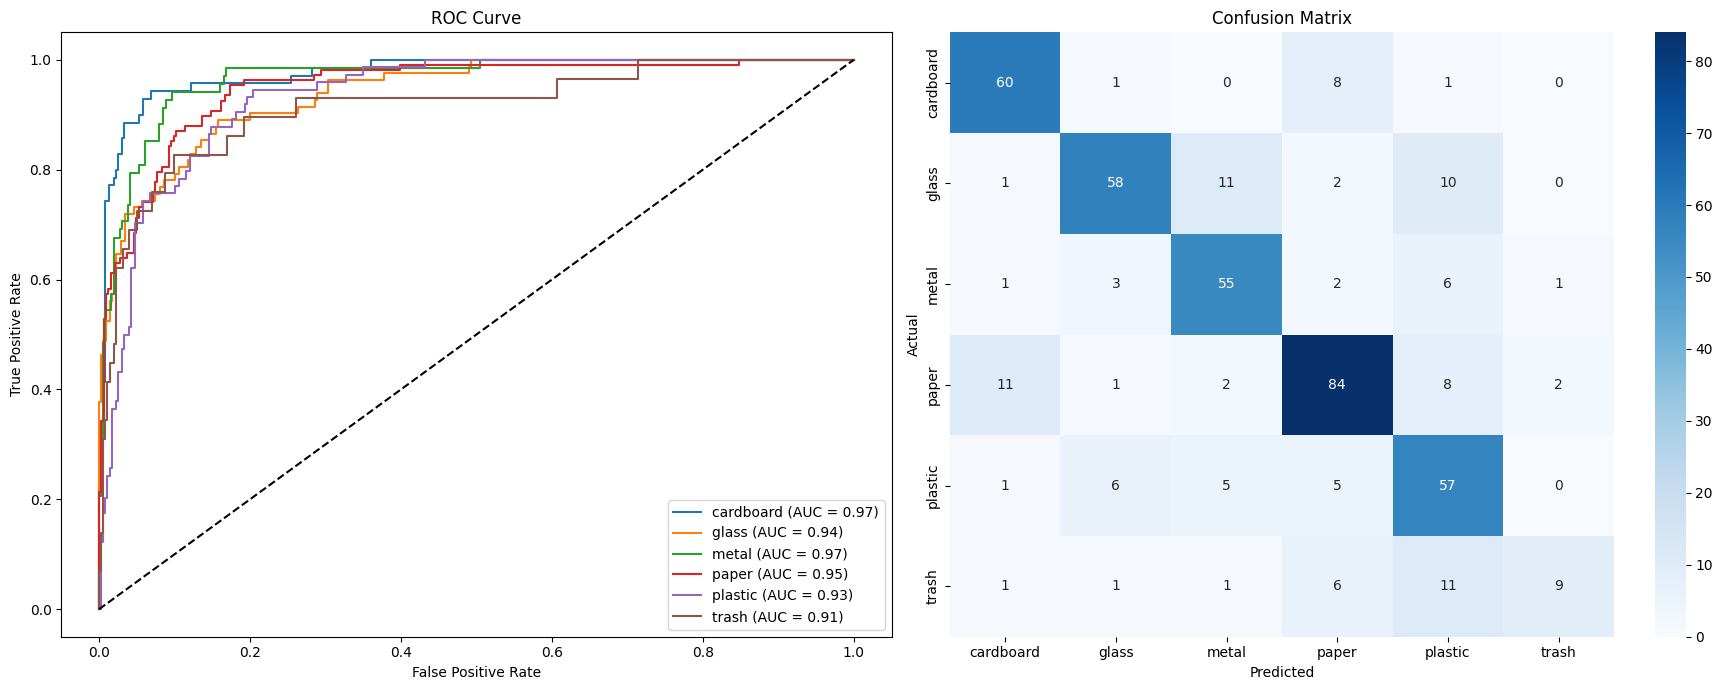

              precision    recall  f1-score   support

   cardboard       0.80      0.86      0.83        70
       glass       0.83      0.71      0.76        82
       metal       0.74      0.81      0.77        68
       paper       0.79      0.78      0.78       108
     plastic       0.61      0.77      0.68        74
       trash       0.75      0.31      0.44        29

    accuracy                           0.75       431
   macro avg       0.75      0.71      0.71       431
weighted avg       0.76      0.75      0.74       431



In [18]:
from keras.models import load_model

print("\nLoading the model")
model = load_model('aug_vgg_model.h5')
model_l2 = load_model('aug_vgg_model_l2.h5')
model_l1 = load_model('aug_vgg_model_l1.h5')
model_dropout = load_model('aug_vgg_model_dropout.h5')
model_es = load_model('aug_vgg_model_es.h5')
model_de = load_model('aug_vgg_model_de.h5')

for m in [model, model_l2, model_l1, model_dropout, model_es, model_de]:
    print("\nEvaluating the model")
    predictions = m.predict(X_test)
    loss, accuracy = m.evaluate(X_test, y_test)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    evaluate_model(predictions, y_test, classes_names)